#Limpeza

In [ ]:
#importando os pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


sns.set_style()
%matplotlib inline

###Informações adicionais

Esta pesquisa empregou uma variável binária, pagamento inadimplente (Sim = 1, Não = 0), como variável resposta. Este estudo revisou a literatura e utilizou as seguintes 23 variáveis ​​como variáveis ​​explicativas:

X1: Valor do crédito concedido (dólar NT): inclui tanto o crédito ao consumidor individual quanto o crédito familiar (complementar).

X2: Gênero (1 = masculino; 2 = feminino).

X3: Escolaridade (1 = pós-graduação; 2 = superior; 3 = ensino médio; 4 = outros).

X4: Estado civil (1 = casado; 2 = solteiro; 3 = outros).

X5: Idade (ano).

X6 - X11: Histórico de pagamentos anteriores. Acompanhamos os registros de pagamentos mensais anteriores (de abril a setembro de 2005) da seguinte forma: X6 = situação de pagamento em setembro de 2005; X7 = situação de reembolso em agosto de 2005; . . .;X11 = situação de reembolso em abril de 2005. A escala de mensuração da situação de reembolso é: -1 = pagar em dia; 1 = atraso de pagamento de um mês; 2 = atraso no pagamento há dois meses; . . .; 8 = atraso no pagamento há oito meses; 9 = atraso no pagamento por nove meses ou mais.

X12-X17: Valor do extrato da conta (dólar NT). X12 = valor do extrato da conta em setembro de 2005; X13 = valor do extrato da conta em agosto de 2005; . . .; X17 = valor do extrato da conta em abril de 2005.

X18-X23: Valor do pagamento anterior (dólar NT). X18 = valor pago em setembro de 2005; X19 = valor pago em agosto de 2005; . . .;X23 = valor pago em abril de 2005.



In [ ]:
#origem dos dados
# link https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

dataset = "/content/drive/MyDrive/Univesp/tcc/default of credit card clients.xls"
df_credit = pd.read_excel(dataset,header=1)
df_credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#verificando o tamanho do dataset
df_credit.shape

(30000, 25)

In [ ]:
#descrevendo melhor os dados
df_credit.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [ ]:
#corrigindo nomes de colunas
#PAY_0 PARA PAY_1
#default payment next month para def_pay

df_credit.rename(columns={'default payment next month':'def_pay'}, inplace=True)
df_credit.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [ ]:
df_credit.drop(columns='ID',inplace=True)

In [ ]:
#verificar se tem valores nulos
df_credit.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

In [ ]:
#Verificar os tipos de dados
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [ ]:
#nomes das colunas
df_credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

In [ ]:
#verificar correlação entre as caracteristicas e valores
corr = df_credit.corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000


<Axes: >

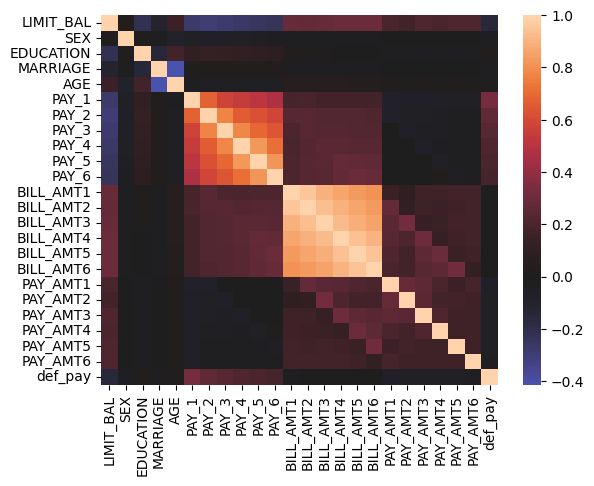

In [ ]:
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center =0)

#Analisar as variáveis explicaticas

In [ ]:
#separar as variáveis caracteristica e respostas
X = df_credit.drop('def_pay', axis = 1)
y = df_credit['def_pay']

In [ ]:
#importando o teste estatístico
from sklearn.feature_selection import f_classif

In [ ]:
[f_stat, f_p_value] = f_classif(X,y)

In [ ]:
#verificando os valores para cada caracteristica do teste estatístico
f_test_df = pd.DataFrame({'Feature': df_credit.columns[:-1],
                          'F statistic':f_stat,
                          'p value': f_p_value})

f_test_df.sort_values('p value')

,Feature,F statistic,p value
5,PAY_1,3537.714970,0.000000e+00
6,PAY_2,2239.169136,0.000000e+00
7,PAY_3,1757.466444,0.000000e+00
8,PAY_4,1476.845967,1.899297e-315
9,PAY_5,1304.591176,1.126608e-279
10,PAY_6,1085.402485,7.296740e-234
0,LIMIT_BAL,724.068539,1.302244e-157
17,PAY_AMT1,160.403810,1.146488e-36
18,PAY_AMT2,103.291524,3.166657e-24
20,PAY_AMT4,97.188000,6.830942e-23


In [ ]:
#obter os indices das carcteristicas consideradas pelo teste estatística como as 20% melhores
from sklearn.feature_selection import SelectPercentile
seletor=SelectPercentile(f_classif,percentile=20)
seletor.fit(X,y)

SelectPercentile(percentile=20)

In [ ]:
#obtendo o indice lógico
melhores_caracteristicas = seletor.get_support()
melhores_caracteristicas

array([False, False, False, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [ ]:
#nomes das caracteristicas
caracteristicas = df_credit.columns[:-1]
nome_melhores_caracteristicas = [caracteristicas[nomes] for nomes in range(len(caracteristicas)) if melhores_caracteristicas[nomes]]

In [ ]:
nome_melhores_caracteristicas


['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']

In [ ]:
df_credit[nome_melhores_caracteristicas]

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5
0,2,2,-1,-1,-2
1,-1,2,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,-1,0,-1,0,0
...,...,...,...,...,...
29995,0,0,0,0,0
29996,-1,-1,-1,-1,0
29997,4,3,2,-1,0
29998,1,-1,0,0,0


#Balanceamento dos dados

In [ ]:
df_credit.def_pay.value_counts(normalize=True)*100


0    77.88
1    22.12
Name: def_pay, dtype: float64

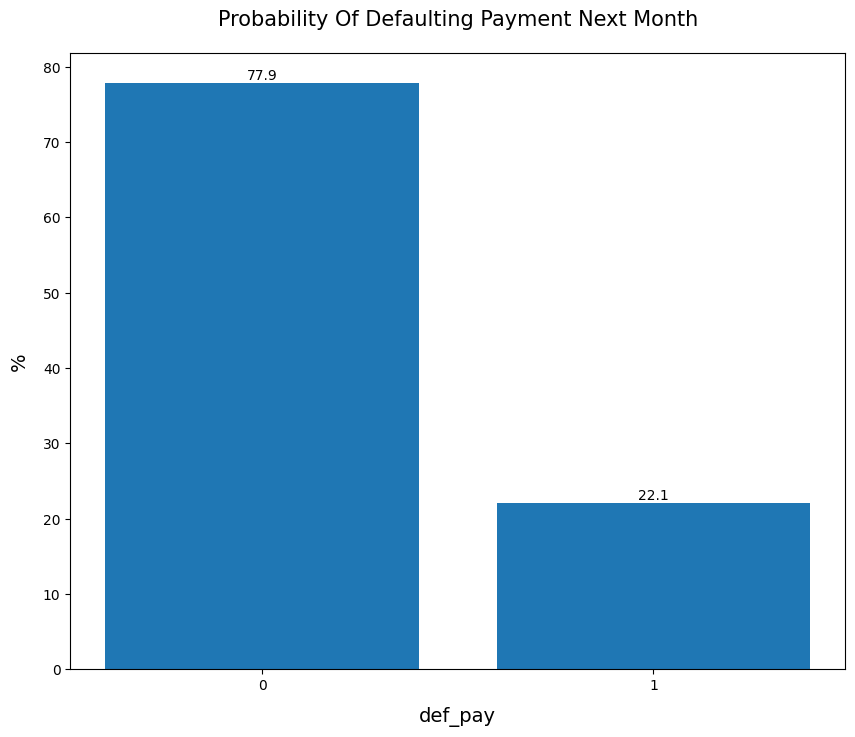

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
dados = (df_credit.def_pay.value_counts(normalize=True)*100)
x = df_credit['def_pay'].unique()
x.sort()

#plotando o gráfico
grafico_def_pay = ax.bar(x = x, height=dados, data=df_credit['def_pay'])
ax.set_title("Probability Of Defaulting Payment Next Month", fontsize=15, pad=20)
ax.set_xlabel('def_pay', fontsize=14, labelpad=10)
ax.set_ylabel('%', fontsize=14, labelpad=10)
ax.set_xticks(x)
ax.set_xticklabels(x)

# colocando o rótulo nas barras
ax.bar_label(grafico_def_pay, fmt="%.01f", size=10, label_type="edge")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [ ]:
df_credit_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
df_credit_final .head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


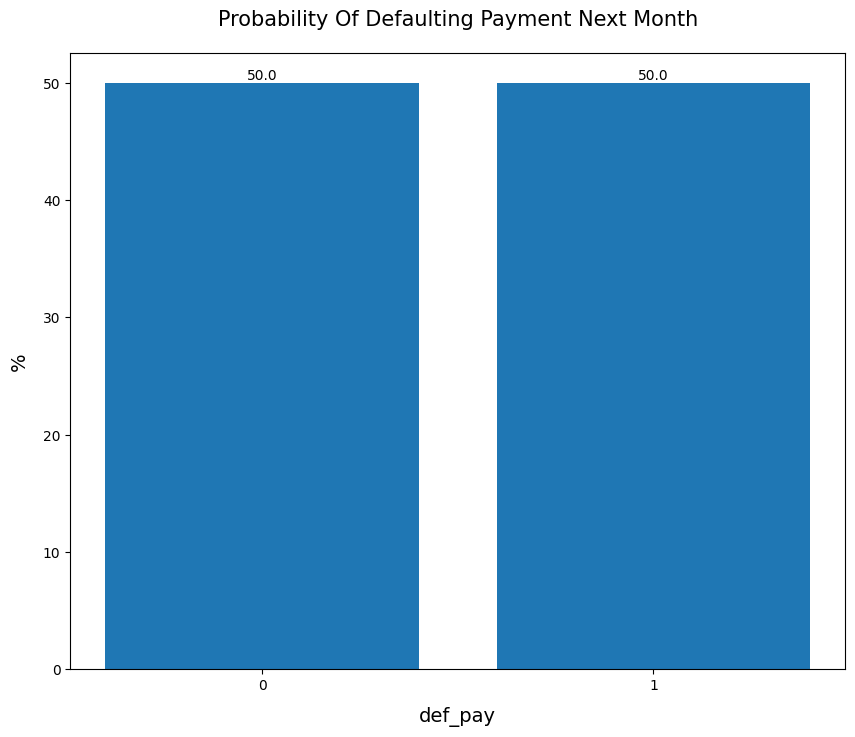

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
dados = (df_credit_final.def_pay.value_counts(normalize=True)*100)
x = df_credit_final['def_pay'].unique()

#plotando o gráfico
grafico_def_pay = ax.bar(x = x, height=dados, data=df_credit_final['def_pay'])
ax.set_title("Probability Of Defaulting Payment Next Month", fontsize=15, pad=20)
ax.set_xlabel('def_pay', fontsize=14, labelpad=10)
ax.set_ylabel('%', fontsize=14, labelpad=10)
ax.set_xticks(x)
ax.set_xticklabels(x)

# colocando o rótulo nas barras
ax.bar_label(grafico_def_pay, fmt="%.01f", size=10, label_type="edge")
plt.show()

#xgboost

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb

In [ ]:
X_credit_final = df_credit_final.drop(['def_pay'], axis=1)
y_credit_final = df_credit_final['def_pay']

In [ ]:
X_credit_final_train, X_credit_final_test, y_credit_final_train, y_credit_final_test = train_test_split(X_credit_final, y_credit_final, random_state=42)

In [ ]:
X_credit_final_train.shape, X_credit_final_test.shape

((35046, 23), (11682, 23))

In [ ]:
len(X_credit_final_test) / len(X_credit_final)

0.25

In [ ]:
#Criando o objeto com o classificador XGBoost
classificador_xgb = xgb.XGBClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score


resultado_cv = cross_val_score(classificador_xgb, X_credit_final_train, y_credit_final_train, cv = 10)

resultado_cv

array([0.82025678, 0.82624822, 0.8211127 , 0.82881598, 0.8168331 ,
       0.82482168, 0.81221461, 0.8173516 , 0.82277397, 0.81478311])

In [ ]:
#verificando a acurácia do modelo
acuracia_cv = resultado_cv.mean()

acuracia_cv

0.8205211732749692

In [ ]:
classificador_xgb_modificado = xgb.XGBClassifier(max_depth=2)
100*(cross_val_score(classificador_xgb_modificado, X_credit_final_train, y_credit_final_train).mean())

78.45403454169073

In [ ]:
classificador_xgb_dart =  xgb.XGBClassifier(booster='dart')

100 * cross_val_score(classificador_xgb_dart, X_credit_final_train, y_credit_final_train).mean()

81.78394031395136

In [ ]:
classificador_xgb_gblinear =  xgb.XGBClassifier(booster='gblinear')

100 * cross_val_score(classificador_xgb_gblinear, X_credit_final_train, y_credit_final_train).mean()

71.95115511766103

###Utilizando todos os dados de teste no modelo com melhor resultado

In [ ]:
#melhor modelo
melhor_modelo= classificador_xgb_dart

In [ ]:
melhor_modelo.fit(X_credit_final_train, y_credit_final_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#realizar a predição com a base de teste
predicao_credt_final = melhor_modelo.predict(X_credit_final_test)

In [ ]:
#verificando o numero de acertos
(predicao_credt_final == y_credit_final_test).sum()

9611

In [ ]:
#acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_credit_final_test,predicao_credt_final)

0.822718712549221

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

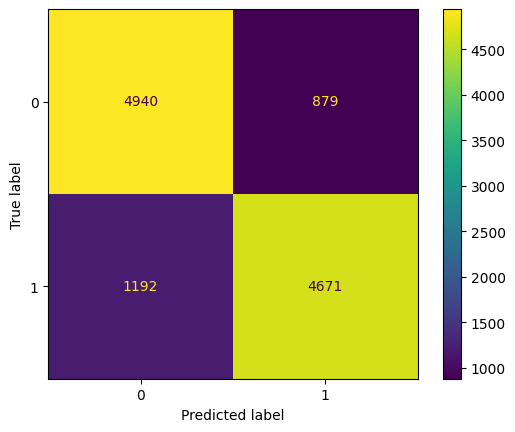

In [ ]:
#matriz de confusão
cm = confusion_matrix(y_credit_final_test,predicao_credt_final, labels=melhor_modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=melhor_modelo.classes_)
disp.plot()

plt.show()

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score
recall_macro = recall_score(y_credit_final_test,predicao_credt_final,average='macro')
precision_macro = precision_score(y_credit_final_test,predicao_credt_final,average='macro')
f1_score_macro = f1_score(y_credit_final_test,predicao_credt_final,average='macro')

print(f'Recall : {recall_macro}')
print(f'Precision : {precision_macro}')
print(f'f1-score : {f1_score_macro}')


Recall : 0.8228171155692019
Precision : 0.8236157684102889
f1-score : 0.8226246615544681


In [ ]:
from imblearn.metrics import specificity_score
specificity_score(y_credit_final_test,predicao_credt_final,average='macro')

print(f'Specificity : {f1_score_macro}')

Specificity : 0.8226246615544681


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
#calcular a probabilidade para curva roc
probabilidade = melhor_modelo.predict_proba(X_credit_final_test)
print(probabilidade)

[[0.21144408 0.7885559 ]
 [0.16727495 0.83272505]
 [0.74407774 0.25592226]
 ...
 [0.5130367  0.48696324]
 [0.05933654 0.94066346]
 [0.8864191  0.11358088]]


In [ ]:
#só os valores das probabilidade das classes
probabilidade= probabilidade[:,1]
print(probabilidade)

[0.7885559  0.83272505 0.25592226 ... 0.48696324 0.94066346 0.11358088]


In [ ]:
auc = roc_auc_score(y_credit_final_test, probabilidade)
print(auc)

0.9005225197429875


In [ ]:
fpr, tpr, thresholds = roc_curve(y_credit_final_test, probabilidade)

In [ ]:
# gerando uma baseline
baseline = [0 for _ in range(len(y_credit_final_test))]

In [ ]:
# calculando os scores
baseline_auc = roc_auc_score(y_credit_final_test, baseline)

In [ ]:
base_fpr, base_tpr, _ = roc_curve(y_credit_final_test, baseline)

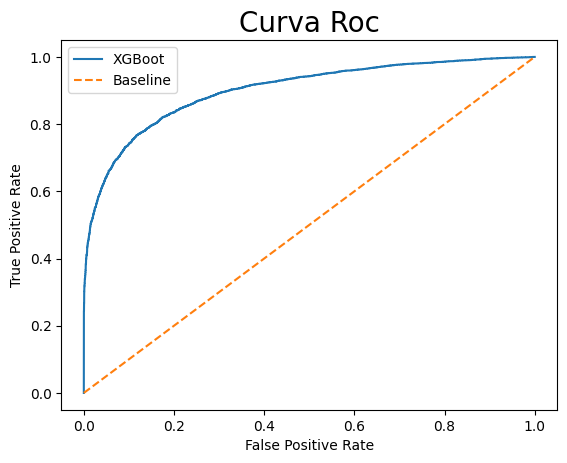

In [ ]:
plt.plot(fpr, tpr, linestyle='-', label='XGBoot')
plt.plot(base_fpr, base_tpr, linestyle='--', label='Baseline')
plt.title('Curva Roc', fontsize=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()